In [1]:
import os
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

import numpy as np
import keras
#from keras import backend as K
#from keras.models import Sequential
#from keras.layers import Activation
#from keras.layers.core import Dense, Flatten
#from keras.optimizers import Adam
#from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
#from keras.layers.convolutional import *
#from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'traindset'
valid_path = 'validset'
test_path = 'testdset'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dogs','cats'], batch_size=200)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dogs','cats'], batch_size=20)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dogs','cats'], batch_size=200)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
vgg16_model = keras.applications.vgg16.VGG16()

In [5]:
model = keras.models.Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [6]:
model.layers.pop()

In [7]:
for layer in model.layers:
    layer.trainable = False

In [8]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [9]:
model.compile(keras.optimizers.Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_batches, steps_per_epoch=10,
                   validation_data=valid_batches, validation_steps=10, epochs=5, verbose=1)

Epoch 1/5
10/10 [==============================] - 51s 5s/step - loss: 0.6797 - acc: 0.7110 - val_loss: 0.6697 - val_acc: 0.8600
Epoch 2/5
10/10 [==============================] - 24s 2s/step - loss: 0.6631 - acc: 0.9270 - val_loss: 0.6585 - val_acc: 0.9650
Epoch 3/5
10/10 [==============================] - 25s 2s/step - loss: 0.6545 - acc: 0.9590 - val_loss: 0.6516 - val_acc: 0.9650
Epoch 4/5
10/10 [==============================] - 25s 2s/step - loss: 0.6486 - acc: 0.9725 - val_loss: 0.6470 - val_acc: 0.9600
Epoch 5/5
10/10 [==============================] - 25s 2s/step - loss: 0.6434 - acc: 0.9780 - val_loss: 0.6426 - val_acc: 0.9600


In [11]:
test_imgs, test_labels = next(test_batches)
test_labels = test_labels[:,0]
test_labels
predictions = model.predict_generator(test_batches, steps=1, verbose=1)

1/1 [==============================] - 3s 3s/step


In [12]:

def plot_confusion_matrix(cm, classes,
                         normalization=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This is function prints and plots the confusion matrix.
    Normalization can be applied by setting 'True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalization:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalization confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="red" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[94  6]
 [ 3 97]]


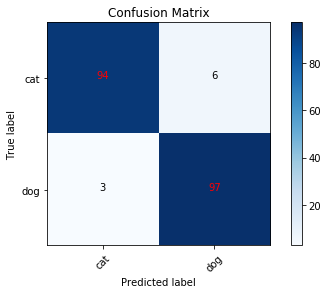

In [13]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')